# Pulsar Star Prediction

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

In [1]:
#Importing dependencies
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from pandas.plotting import scatter_matrix
from matplotlib import cm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from tensorflow import keras
import itertools
import seaborn as sns

Using TensorFlow backend.


In [2]:
#Reading the data using pandas
data = pd.read_csv("pulsar_stars.csv")

In [3]:
#Printing the column names / features, based on which predictions are made
list(data.columns.values)

[' Mean of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Skewness of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Skewness of the DM-SNR curve',
 'target_class']

## Here is a brief description of the data

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.

Class
HTRU 2 
Summary: 17,898 total examples; 1,639 positive examples; 16,259 negative examples.

In [4]:
columns = " Mean of the integrated profile, Standard deviation of the integrated profile, Excess kurtosis of the integrated profile, Skewness of the integrated profile, Mean of the DM-SNR curve, Standard deviation of the DM-SNR curve, Excess kurtosis of the DM-SNR curve, Skewness of the DM-SNR curve,target_class".split(',')
#print(columns)

In [5]:
df = pd.DataFrame(data, columns = columns)
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## Plotting the distribution of the Variables in Data Set
(Similar to the plotting in the data set given in Kaggle)

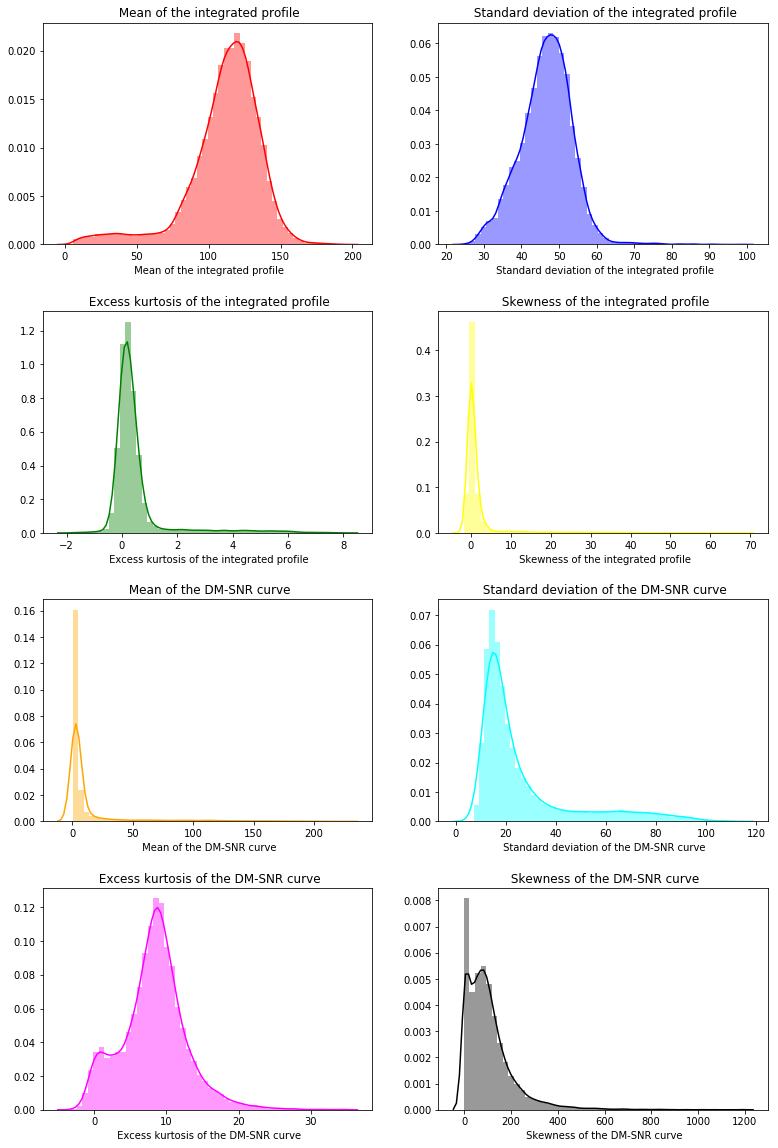

In [6]:
columns.pop(8)
l  = len(columns)
colors  = ["red","blue","green","yellow","orange","cyan","magenta","black"] 

#Plotting the graphs
plt.figure(figsize=(13,20))
for i,j,k in itertools.zip_longest(columns,range(l),colors):
    plt.subplot(l/2,l/4,j+1)
    sns.distplot(data[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)

## Pair Plot Between all the variables

In [7]:
feature_name=[' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']
x = data[feature_name]
y = data["target_class"]

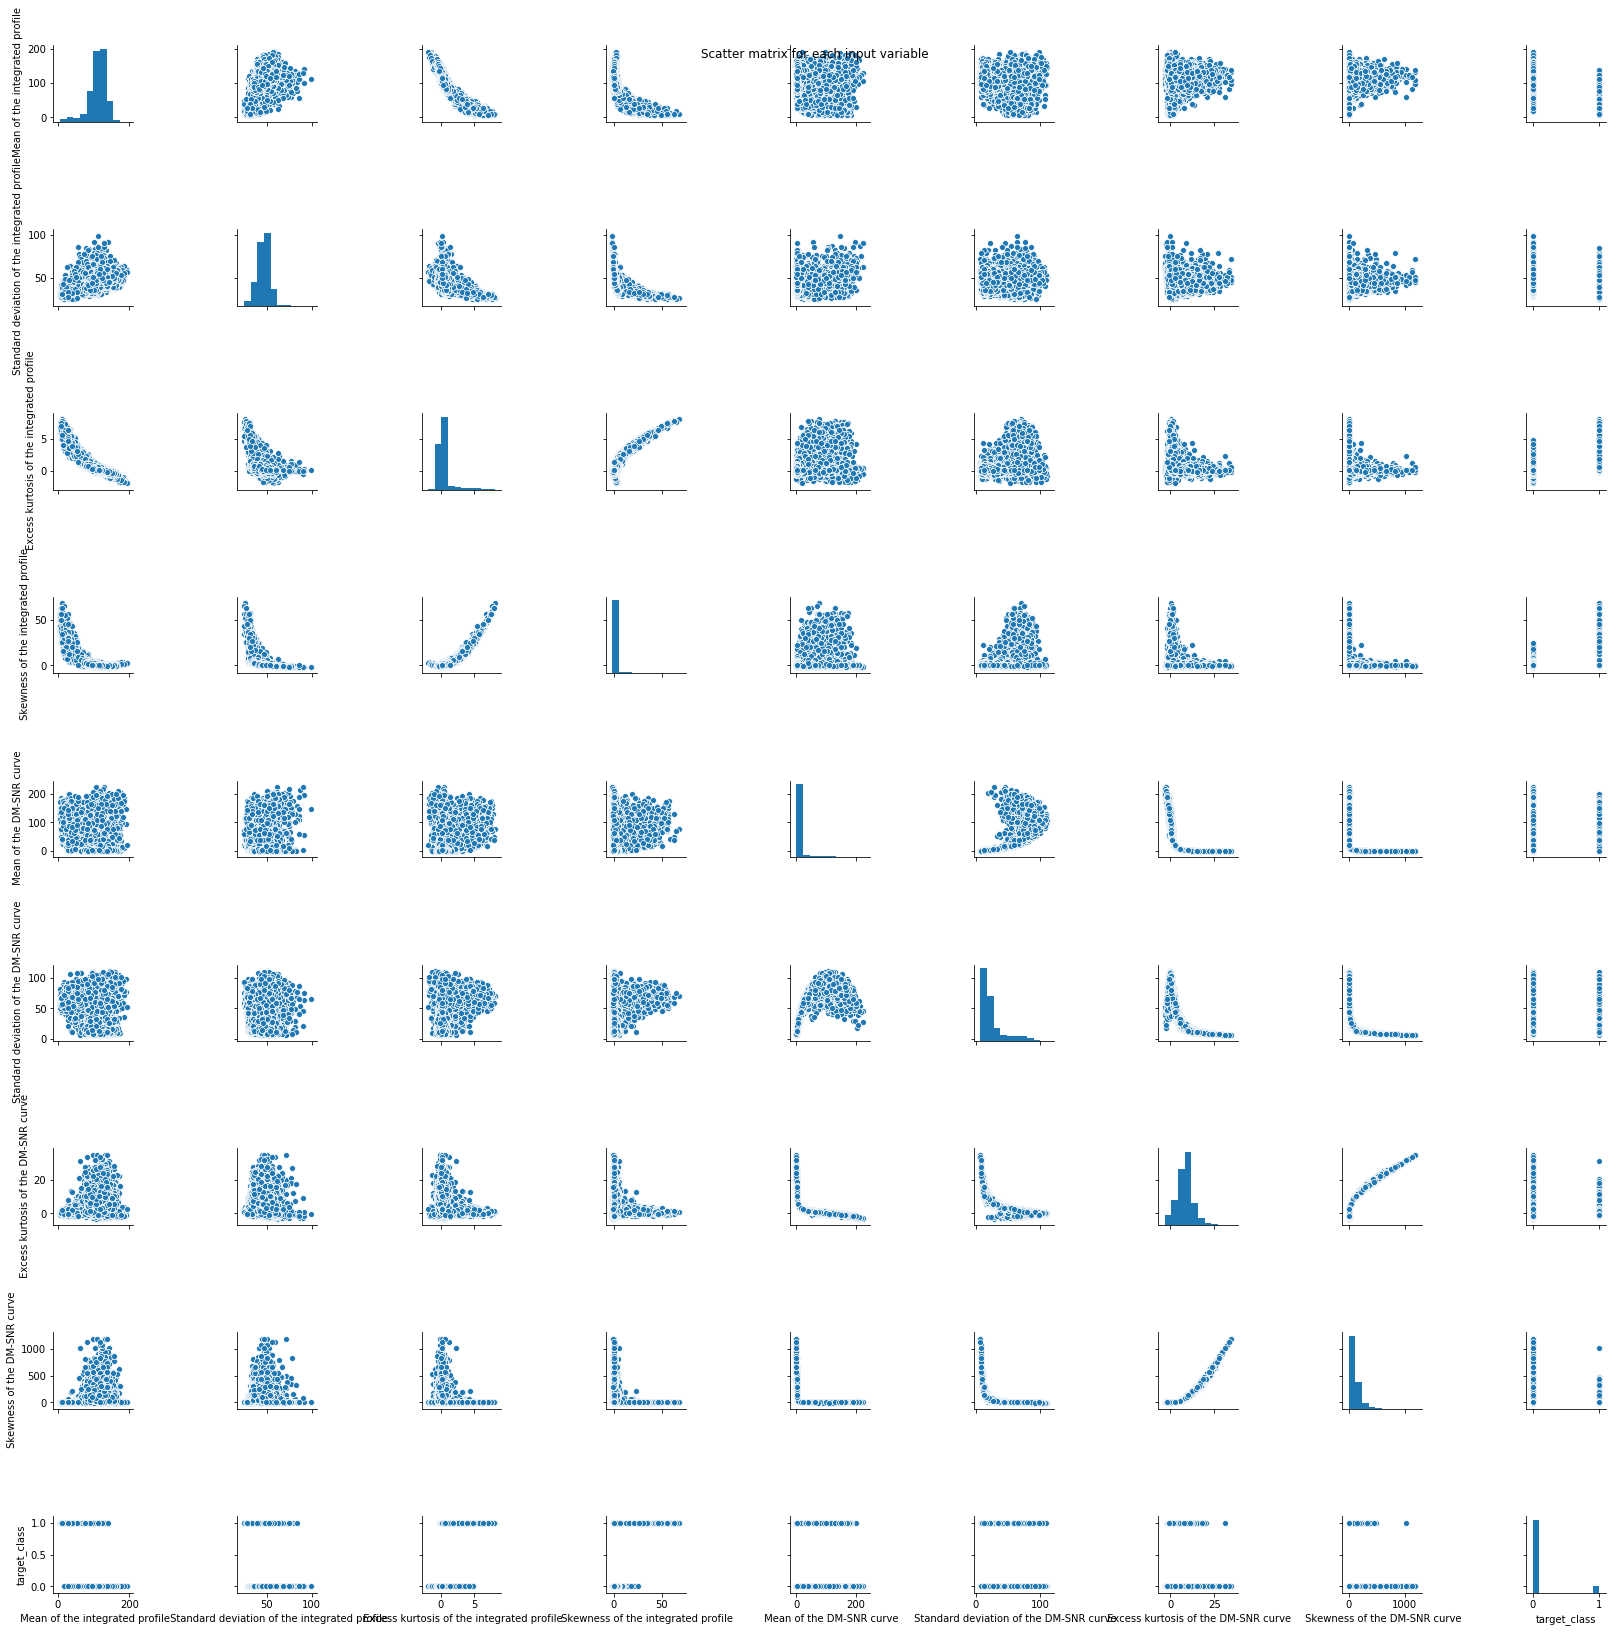

In [8]:
sns.pairplot(data)
#Plotting the graphs
plt.suptitle("Scatter matrix for each input variable")
plt.show()

In [9]:
#Printing the unique values of the class to be predicted
print(y.unique())

[0 1]


## Splitting the Data Set
The Data Set is split in to 75 : 25 ratio. 75% of the data is for the training phase and the rest 25% for testing the model after completion of training.
The data corresponding to Pulsar Stars and Non-Pulsar Stars is of the ratio of around 1 : 10 and the data is evenly distributed. So the data set is not shuffled. 

In [10]:
#Splitting the data set using the train_test_split()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [11]:
#Printing the shape of the target class for both the traing phase and the testing phase.
print(y_train.shape)
print(y_test.shape)

(13423,)
(4475,)


## Thus, in the  training phase we have 13423 data and in the testing phase we have 4475 data

In [12]:
#Converting the target values to labelled data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# The Neural Network Architecture

Our Simple Neural Network is divided in 5 layers. Each layer has a certain no of neurons: 

Layer Name: "Input Layer"(8) --> "Hidden Layer 1"(128) --> "Hidden Layer 2"(64) --> "Hidden Layer 3"(20) --> "Output Layer"(2)

The model is built by stacking dense layer one after another. I have avoided using Dropout in the network.

Note: The code for building the model is commented, because I have pre-trained the network with high accuracy, that will be loaded into, as the "model".

In [13]:
'''
model = tf.keras.models.Sequential()
layer1 = tf.keras.layers.Dense(128, input_shape = [8])
model.add(layer1)
layer2 = tf.keras.layers.Dense(64)
model.add(layer2)
layer3 = tf.keras.layers.Dense(20)
model.add(layer3)
model.add(tf.keras.layers.Dense(2, activation="softmax"))
'''

'\nmodel = tf.keras.models.Sequential()\nlayer1 = tf.keras.layers.Dense(128, input_shape = [8])\nmodel.add(layer1)\nlayer2 = tf.keras.layers.Dense(64)\nmodel.add(layer2)\nlayer3 = tf.keras.layers.Dense(20)\nmodel.add(layer3)\nmodel.add(tf.keras.layers.Dense(2, activation="softmax"))\n'

## Defining the parameters

As for optimizer, I have opted for the "Adam Optimizer" with the default values as provided in the original papers.
The "Binary Crossentropy" is being used as the Loss function.

In [14]:
'''
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
'''

"\nmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])\n"

## Loding a pre-trained model

In [15]:

model = keras.models.load_model('pulsar_star_predict_model.h5')


In [16]:
#Printing the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1300      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 42        
Total params: 10,750
Trainable params: 10,750
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Trainig the model on the data.
#Here I am using 1000 epoch, but the total epoch is 2500
trained_model = model.fit(x_train, y_train, epochs = 1000)

Epoch 1/1000
13423/13423 [==============================] - 3s 222us/step - loss: 0.0771 - acc: 0.9779
Epoch 2/1000
13423/13423 [==============================] - 2s 148us/step - loss: 0.0772 - acc: 0.9782 0s - loss: 0
Epoch 3/1000
13423/13423 [==============================] - 2s 161us/step - loss: 0.0773 - acc: 0.9779
Epoch 4/1000
13423/13423 [==============================] - 2s 129us/step - loss: 0.0769 - acc: 0.9782
Epoch 5/1000
13423/13423 [==============================] - 2s 119us/step - loss: 0.0770 - acc: 0.9781
Epoch 6/1000
13423/13423 [==============================] - 2s 122us/step - loss: 0.0780 - acc: 0.9783
Epoch 7/1000
13423/13423 [==============================] - 2s 121us/step - loss: 0.0768 - acc: 0.9784
Epoch 8/1000
13423/13423 [==============================] - 2s 124us/step - loss: 0.0768 - acc: 0.9785
Epoch 9/1000
13423/13423 [==============================] - 2s 116us/step - loss: 0.0771 - acc: 0.9785
Epoch 10/1000
13423/13423 [==============================] -

13423/13423 [==============================] - 2s 116us/step - loss: 0.0775 - acc: 0.9782
Epoch 79/1000
13423/13423 [==============================] - 2s 113us/step - loss: 0.0774 - acc: 0.9780
Epoch 80/1000
13423/13423 [==============================] - 2s 117us/step - loss: 0.0772 - acc: 0.9785
Epoch 81/1000
13423/13423 [==============================] - 2s 115us/step - loss: 0.0776 - acc: 0.9771
Epoch 82/1000
13423/13423 [==============================] - 2s 116us/step - loss: 0.0769 - acc: 0.9781 1s - los
Epoch 83/1000
13423/13423 [==============================] - 2s 115us/step - loss: 0.0769 - acc: 0.9785
Epoch 84/1000
13423/13423 [==============================] - 2s 116us/step - loss: 0.0770 - acc: 0.9785
Epoch 85/1000
13423/13423 [==============================] - 2s 115us/step - loss: 0.0780 - acc: 0.9779
Epoch 86/1000
13423/13423 [==============================] - 2s 115us/step - loss: 0.0766 - acc: 0.9779
Epoch 87/1000
13423/13423 [==============================] - 1s 110us

13423/13423 [==============================] - 2s 113us/step - loss: 0.0773 - acc: 0.9779
Epoch 156/1000
13423/13423 [==============================] - 2s 113us/step - loss: 0.0770 - acc: 0.9784
Epoch 157/1000
13423/13423 [==============================] - 2s 115us/step - loss: 0.0768 - acc: 0.9787
Epoch 158/1000
13423/13423 [==============================] - 2s 113us/step - loss: 0.0773 - acc: 0.9776
Epoch 159/1000
13423/13423 [==============================] - 2s 115us/step - loss: 0.0777 - acc: 0.9777
Epoch 160/1000
13423/13423 [==============================] - 2s 115us/step - loss: 0.0768 - acc: 0.9779
Epoch 161/1000
13423/13423 [==============================] - 2s 118us/step - loss: 0.0769 - acc: 0.9779
Epoch 162/1000
13423/13423 [==============================] - 1s 77us/step - loss: 0.0783 - acc: 0.9781
Epoch 163/1000
13423/13423 [==============================] - 1s 79us/step - loss: 0.0765 - acc: 0.9782
Epoch 164/1000
13423/13423 [==============================] - 1s 81us/st

13423/13423 [==============================] - 2s 131us/step - loss: 0.0771 - acc: 0.9773
Epoch 233/1000
13423/13423 [==============================] - 2s 135us/step - loss: 0.0773 - acc: 0.9780
Epoch 234/1000
13423/13423 [==============================] - 2s 138us/step - loss: 0.0769 - acc: 0.9782
Epoch 235/1000
13423/13423 [==============================] - 2s 179us/step - loss: 0.0774 - acc: 0.9780
Epoch 236/1000
13423/13423 [==============================] - 2s 153us/step - loss: 0.0778 - acc: 0.9777
Epoch 237/1000
13423/13423 [==============================] - 2s 123us/step - loss: 0.0771 - acc: 0.9779
Epoch 238/1000
13423/13423 [==============================] - 2s 113us/step - loss: 0.0768 - acc: 0.9782
Epoch 239/1000
13423/13423 [==============================] - 2s 120us/step - loss: 0.0770 - acc: 0.9784
Epoch 240/1000
13423/13423 [==============================] - 2s 172us/step - loss: 0.0768 - acc: 0.9775
Epoch 241/1000
13423/13423 [==============================] - 2s 171us

13423/13423 [==============================] - 2s 114us/step - loss: 0.0770 - acc: 0.9782
Epoch 310/1000
13423/13423 [==============================] - 2s 114us/step - loss: 0.0767 - acc: 0.9784
Epoch 311/1000
13423/13423 [==============================] - 1s 99us/step - loss: 0.0765 - acc: 0.9782
Epoch 312/1000
13423/13423 [==============================] - 1s 100us/step - loss: 0.0771 - acc: 0.9776
Epoch 313/1000
13423/13423 [==============================] - 1s 100us/step - loss: 0.0781 - acc: 0.9782
Epoch 314/1000
13423/13423 [==============================] - 1s 101us/step - loss: 0.0772 - acc: 0.9779
Epoch 315/1000
13423/13423 [==============================] - 1s 100us/step - loss: 0.0769 - acc: 0.9784
Epoch 316/1000
13423/13423 [==============================] - 1s 100us/step - loss: 0.0767 - acc: 0.9789
Epoch 317/1000
13423/13423 [==============================] - 1s 100us/step - loss: 0.0772 - acc: 0.9782
Epoch 318/1000
13423/13423 [==============================] - 1s 100us/

13423/13423 [==============================] - 2s 122us/step - loss: 0.0768 - acc: 0.9782
Epoch 387/1000
13423/13423 [==============================] - 2s 113us/step - loss: 0.0772 - acc: 0.9777
Epoch 388/1000
13423/13423 [==============================] - 1s 105us/step - loss: 0.0769 - acc: 0.9787
Epoch 389/1000
13423/13423 [==============================] - 2s 121us/step - loss: 0.0771 - acc: 0.9784
Epoch 390/1000
13423/13423 [==============================] - 2s 121us/step - loss: 0.0769 - acc: 0.9774
Epoch 391/1000
13423/13423 [==============================] - 2s 120us/step - loss: 0.0773 - acc: 0.9782
Epoch 392/1000
13423/13423 [==============================] - 2s 120us/step - loss: 0.0767 - acc: 0.9774
Epoch 393/1000
13423/13423 [==============================] - 2s 115us/step - loss: 0.0773 - acc: 0.9779
Epoch 394/1000
13423/13423 [==============================] - 2s 116us/step - loss: 0.0766 - acc: 0.9782
Epoch 395/1000
13423/13423 [==============================] - 2s 121us

13423/13423 [==============================] - 2s 118us/step - loss: 0.0777 - acc: 0.9780
Epoch 463/1000
13423/13423 [==============================] - 1s 111us/step - loss: 0.0769 - acc: 0.9781
Epoch 464/1000
13423/13423 [==============================] - 2s 112us/step - loss: 0.0765 - acc: 0.9783
Epoch 465/1000
13423/13423 [==============================] - 2s 116us/step - loss: 0.0772 - acc: 0.9776
Epoch 466/1000
13423/13423 [==============================] - 2s 117us/step - loss: 0.0768 - acc: 0.9780
Epoch 467/1000
13423/13423 [==============================] - 2s 120us/step - loss: 0.0773 - acc: 0.9785
Epoch 468/1000
13423/13423 [==============================] - 2s 115us/step - loss: 0.0766 - acc: 0.9785
Epoch 469/1000
13423/13423 [==============================] - 2s 115us/step - loss: 0.0767 - acc: 0.9781
Epoch 470/1000
13423/13423 [==============================] - 2s 114us/step - loss: 0.0771 - acc: 0.9778
Epoch 471/1000
13423/13423 [==============================] - 2s 115us

13423/13423 [==============================] - 2s 134us/step - loss: 0.0762 - acc: 0.9785
Epoch 540/1000
13423/13423 [==============================] - 2s 122us/step - loss: 0.0766 - acc: 0.9779
Epoch 541/1000
13423/13423 [==============================] - 2s 116us/step - loss: 0.0773 - acc: 0.9779
Epoch 542/1000
13423/13423 [==============================] - 2s 133us/step - loss: 0.0766 - acc: 0.9785 1s -
Epoch 543/1000
13423/13423 [==============================] - 2s 114us/step - loss: 0.0775 - acc: 0.9779
Epoch 544/1000
13423/13423 [==============================] - 2s 113us/step - loss: 0.0772 - acc: 0.9783
Epoch 545/1000
13423/13423 [==============================] - 2s 112us/step - loss: 0.0772 - acc: 0.9784 0s - loss: 0.0782 - acc: 0
Epoch 546/1000
13423/13423 [==============================] - 2s 135us/step - loss: 0.0772 - acc: 0.9778
Epoch 547/1000
13423/13423 [==============================] - 2s 140us/step - loss: 0.0761 - acc: 0.9784
Epoch 548/1000
13423/13423 [==========

13423/13423 [==============================] - 2s 116us/step - loss: 0.0772 - acc: 0.9781
Epoch 616/1000
13423/13423 [==============================] - 2s 117us/step - loss: 0.0770 - acc: 0.9782
Epoch 617/1000
13423/13423 [==============================] - 2s 115us/step - loss: 0.0787 - acc: 0.9776
Epoch 618/1000
13423/13423 [==============================] - 2s 117us/step - loss: 0.0766 - acc: 0.9784
Epoch 619/1000
13423/13423 [==============================] - 2s 121us/step - loss: 0.0770 - acc: 0.9783
Epoch 620/1000
13423/13423 [==============================] - 2s 112us/step - loss: 0.0775 - acc: 0.9781
Epoch 621/1000
13423/13423 [==============================] - 2s 112us/step - loss: 0.0768 - acc: 0.9782
Epoch 622/1000
13423/13423 [==============================] - 2s 113us/step - loss: 0.0770 - acc: 0.9785
Epoch 623/1000
13423/13423 [==============================] - 2s 125us/step - loss: 0.0767 - acc: 0.9781
Epoch 624/1000
13423/13423 [==============================] - 2s 145us

13423/13423 [==============================] - 2s 116us/step - loss: 0.0775 - acc: 0.9785
Epoch 693/1000
13423/13423 [==============================] - 2s 119us/step - loss: 0.0768 - acc: 0.9782
Epoch 694/1000
13423/13423 [==============================] - 2s 114us/step - loss: 0.0769 - acc: 0.9785
Epoch 695/1000
13423/13423 [==============================] - 2s 117us/step - loss: 0.0770 - acc: 0.9781
Epoch 696/1000
13423/13423 [==============================] - 2s 114us/step - loss: 0.0770 - acc: 0.9787
Epoch 697/1000
13423/13423 [==============================] - 2s 113us/step - loss: 0.0769 - acc: 0.9779
Epoch 698/1000
13423/13423 [==============================] - 1s 110us/step - loss: 0.0757 - acc: 0.9785
Epoch 699/1000
13423/13423 [==============================] - 2s 113us/step - loss: 0.0764 - acc: 0.9773
Epoch 700/1000
13423/13423 [==============================] - 2s 120us/step - loss: 0.0773 - acc: 0.9784
Epoch 701/1000
13423/13423 [==============================] - 2s 118us

13423/13423 [==============================] - 1s 109us/step - loss: 0.0773 - acc: 0.9785
Epoch 768/1000
13423/13423 [==============================] - 2s 156us/step - loss: 0.0771 - acc: 0.9777
Epoch 769/1000
13423/13423 [==============================] - 2s 168us/step - loss: 0.0763 - acc: 0.9783
Epoch 770/1000
13423/13423 [==============================] - 2s 167us/step - loss: 0.0775 - acc: 0.9782
Epoch 771/1000
13423/13423 [==============================] - 2s 177us/step - loss: 0.0766 - acc: 0.9782
Epoch 772/1000
13423/13423 [==============================] - 2s 136us/step - loss: 0.0767 - acc: 0.9780
Epoch 773/1000
13423/13423 [==============================] - 2s 119us/step - loss: 0.0765 - acc: 0.9791 1s - loss:
Epoch 774/1000
13423/13423 [==============================] - 2s 146us/step - loss: 0.0772 - acc: 0.9779
Epoch 775/1000
13423/13423 [==============================] - 2s 135us/step - loss: 0.0768 - acc: 0.9782
Epoch 776/1000
13423/13423 [==============================]

13423/13423 [==============================] - 2s 114us/step - loss: 0.0773 - acc: 0.9777 1s - loss: 0.0833 - acc: 0.977 - ETA: 1s - loss:
Epoch 843/1000
13423/13423 [==============================] - 2s 115us/step - loss: 0.0771 - acc: 0.9783
Epoch 844/1000
13423/13423 [==============================] - 2s 116us/step - loss: 0.0768 - acc: 0.9782
Epoch 845/1000
13423/13423 [==============================] - 2s 118us/step - loss: 0.0767 - acc: 0.9784 1s 
Epoch 846/1000
13423/13423 [==============================] - 2s 116us/step - loss: 0.0766 - acc: 0.9776
Epoch 847/1000
13423/13423 [==============================] - 2s 115us/step - loss: 0.0781 - acc: 0.9779
Epoch 848/1000
13423/13423 [==============================] - 2s 112us/step - loss: 0.0761 - acc: 0.9777
Epoch 849/1000
13423/13423 [==============================] - 2s 113us/step - loss: 0.0769 - acc: 0.9779
Epoch 850/1000
13423/13423 [==============================] - 2s 113us/step - loss: 0.0765 - acc: 0.9786
Epoch 851/1000
13

13423/13423 [==============================] - 2s 119us/step - loss: 0.0765 - acc: 0.9785
Epoch 919/1000
13423/13423 [==============================] - 2s 138us/step - loss: 0.0771 - acc: 0.9788
Epoch 920/1000
13423/13423 [==============================] - 2s 134us/step - loss: 0.0766 - acc: 0.9785
Epoch 921/1000
13423/13423 [==============================] - 2s 116us/step - loss: 0.0765 - acc: 0.9784
Epoch 922/1000
13423/13423 [==============================] - 2s 123us/step - loss: 0.0767 - acc: 0.9780
Epoch 923/1000
13423/13423 [==============================] - 2s 126us/step - loss: 0.0766 - acc: 0.9787 0s - loss: 0.0750 - acc: 0.97
Epoch 924/1000
13423/13423 [==============================] - 2s 122us/step - loss: 0.0767 - acc: 0.9776 0s - loss: 0.0770 - acc: 0
Epoch 925/1000
13423/13423 [==============================] - 2s 138us/step - loss: 0.0768 - acc: 0.9783
Epoch 926/1000
13423/13423 [==============================] - 3s 200us/step - loss: 0.0767 - acc: 0.9785
Epoch 927/100

13423/13423 [==============================] - 2s 115us/step - loss: 0.0770 - acc: 0.9774
Epoch 994/1000
13423/13423 [==============================] - 2s 126us/step - loss: 0.0761 - acc: 0.9784
Epoch 995/1000
13423/13423 [==============================] - 2s 139us/step - loss: 0.0768 - acc: 0.9779
Epoch 996/1000
13423/13423 [==============================] - 2s 141us/step - loss: 0.0767 - acc: 0.9784
Epoch 997/1000
13423/13423 [==============================] - 2s 137us/step - loss: 0.0767 - acc: 0.9779
Epoch 998/1000
13423/13423 [==============================] - 2s 131us/step - loss: 0.0764 - acc: 0.9789
Epoch 999/1000
13423/13423 [==============================] - 2s 129us/step - loss: 0.0771 - acc: 0.9782
Epoch 1000/1000
13423/13423 [==============================] - 2s 137us/step - loss: 0.0768 - acc: 0.9779 0s - loss: 0.0


In [18]:
#Evaluating the performance of the trained model on the test-data set
score = model.evaluate(x_test, y_test)

4475/4475 [==============================] - 0s 87us/step


In [19]:
print("Model score: ", score)

Model score:  [0.06889629924763514, 0.9814525140996752]


In [20]:
print(trained_model.history.keys())

dict_keys(['loss', 'acc'])


## Plotting the accuracy curve during the training of the model. 

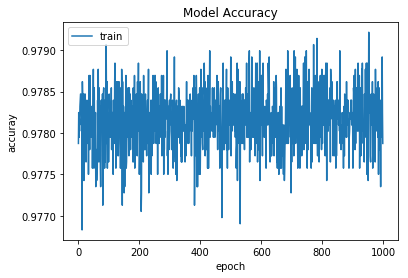

In [21]:
plt.plot(trained_model.history['acc'])
plt.title("Model Accuracy")
plt.ylabel('accuray')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [24]:

#Saving the model
model.save('pulsar_star_predict_model.h5')


# And, thats it. 